---
---
# **Presentacion🪐**
>
>
## *Introducción:*
>
>
>**Contexto empresarial:**
>
>El Planetario Galileo Galilei está haciendo una recopilación de datos en base al tiempo transcurrido sobre el hallazgo de planetas con el fin de realizar una presentación para exponer a las nuevas generaciones y atraer al mundo de la astronomía a aquellos interesados.
>
>Fuiste contratado para realizar una reseña de todos los datos recopilados con visualizaciones que ayuden a realizar esta presentación para el público.
>
>**Problema comercial:**
>
>Te asignaron la tarea de responder a las siguientes incógnitas que necesitan para la presentación.
>
>>Según los tipos de planetas, ¿Cuántos hay de cada uno?
>>
>>¿Qué relación encuentras entre los datos de los planetas?
>>
>>¿Cómo los encontramos?
>
>**Contexto analítico:**
>
>Se nos ha proporcionado un dataset en formato CSV el cual contiene la información acumulada de hallazgos de 1992 a 2023



### **Link Presetacion:** [Click aqui](https://docs.google.com/presentation/d/1Lez0xzu-SwLFJH7Y1Av4dT5pFLOu-IspHuiBZcKk6fU/edit?usp=sharing)

#**Configuracion**:

In [199]:
!pip install kaggle
!mkdir ~/.kaggle
!gdown --id 1yI2x4qazF5vuMFw_aof-4laGe366TyrJ
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('bmh')
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

mkdir: cannot create directory ‘/root/.kaggle’: File exists
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1yI2x4qazF5vuMFw_aof-4laGe366TyrJ
To: /content/kaggle.json
100% 66.0/66.0 [00:00<00:00, 317kB/s]


---
---

# **Optencion de datos:**

> ### **DataSet** :

En este dataset nos encontramos en el analisis de los planetas descubiertos en nuestro gran universo.
>
Podemos destacar entre sus caracateristicas:
  >
  La distancia: Años luz entre el planeta tierra y el descubierto
  >
  El tipo de planeta: Composicion del planeta
  >
  El año de descubrimiento
  >
  Su magnitud estelar: La intencidad en su brillo
  >
  Entrer otras...

In [200]:
!kaggle datasets download -d adityamishraml/nasaexoplanets -f cleaned_5250.csv
!unzip -o cleaned_5250.csv.zip
df_Nasa = pd.read_csv('cleaned_5250.csv')
df_Nasa.head()


cleaned_5250.csv: Skipping, found more recently modified local copy (use --force to force download)
unzip:  cannot find or open cleaned_5250.csv.zip, cleaned_5250.csv.zip.zip or cleaned_5250.csv.zip.ZIP.


,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity


---
---
# ***Análisis y procesamiento datos nulos:***
> Suplencia por moda y eliminación de planetas Unknown ya que al ser solo 5 no modifica los análisis, ya que sino los confunde.


In [201]:
df_nasa= df_Nasa
df_nasa.drop(df_Nasa[(df_Nasa['planet_type'] == "Unknown")].index, inplace=True) # Eliminamos las 5 filas que poseen como
                                                                                    # dato "Unknown" de tipo de planetas

In [202]:
df_nasa.isnull().sum()

name                   0
distance              17
stellar_magnitude    161
planet_type            0
discovery_year         0
mass_multiplier       18
mass_wrt              18
radius_multiplier     12
radius_wrt            12
orbital_radius       286
orbital_period         0
eccentricity           0
detection_method       0
dtype: int64

<Axes: >

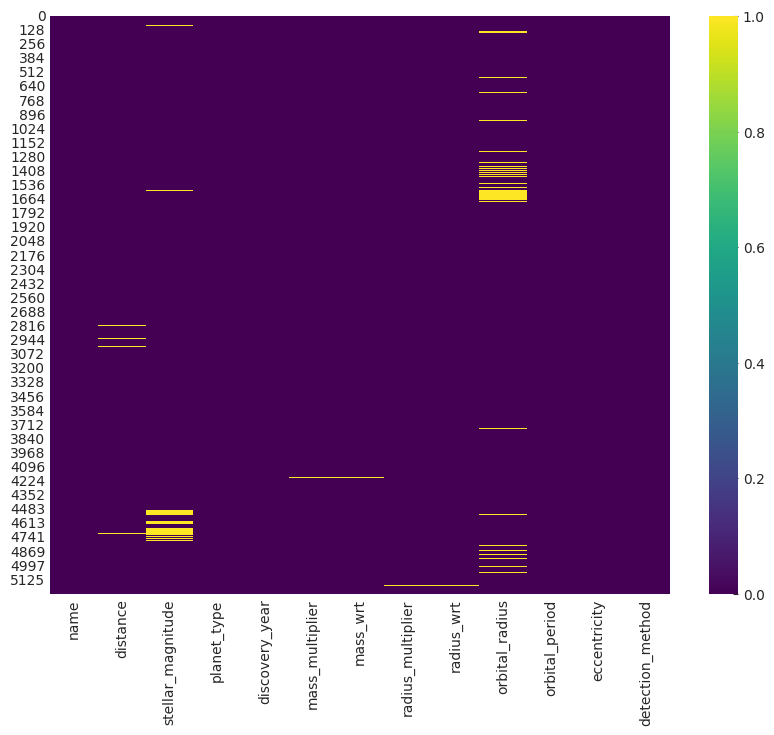

In [203]:
sns.heatmap(df_nasa.isnull(),cmap = 'viridis')

In [204]:
# reemplazar con la moda
valores = df_nasa.values
imputador = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
transformados = imputador.fit_transform(valores)                                #Definir el imputador
transformados = pd.DataFrame(transformados)                                     #Transformar el dataset
columns_names_list = list(df_nasa)
df_nasa = transformados
df_nasa.columns = columns_names_list

df_nasa.head()

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.4,Jupiter,1.08,Jupiter,1.29,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.013,Gas Giant,2009,14.74,Jupiter,1.09,Jupiter,1.53,1.4,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.8,Jupiter,1.15,Jupiter,0.83,0.508693,0.0,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.8,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.215,Gas Giant,1996,1.78,Jupiter,1.2,Jupiter,1.66,2.2,0.68,Radial Velocity


In [205]:
df_nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5245 entries, 0 to 5244
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               5245 non-null   object
 1   distance           5245 non-null   object
 2   stellar_magnitude  5245 non-null   object
 3   planet_type        5245 non-null   object
 4   discovery_year     5245 non-null   object
 5   mass_multiplier    5245 non-null   object
 6   mass_wrt           5245 non-null   object
 7   radius_multiplier  5245 non-null   object
 8   radius_wrt         5245 non-null   object
 9   orbital_radius     5245 non-null   object
 10  orbital_period     5245 non-null   object
 11  eccentricity       5245 non-null   object
 12  detection_method   5245 non-null   object
dtypes: object(13)
memory usage: 532.8+ KB


In [206]:
df_nasa.isnull().sum()

name                 0
distance             0
stellar_magnitude    0
planet_type          0
discovery_year       0
mass_multiplier      0
mass_wrt             0
radius_multiplier    0
radius_wrt           0
orbital_radius       0
orbital_period       0
eccentricity         0
detection_method     0
dtype: int64

<Axes: >

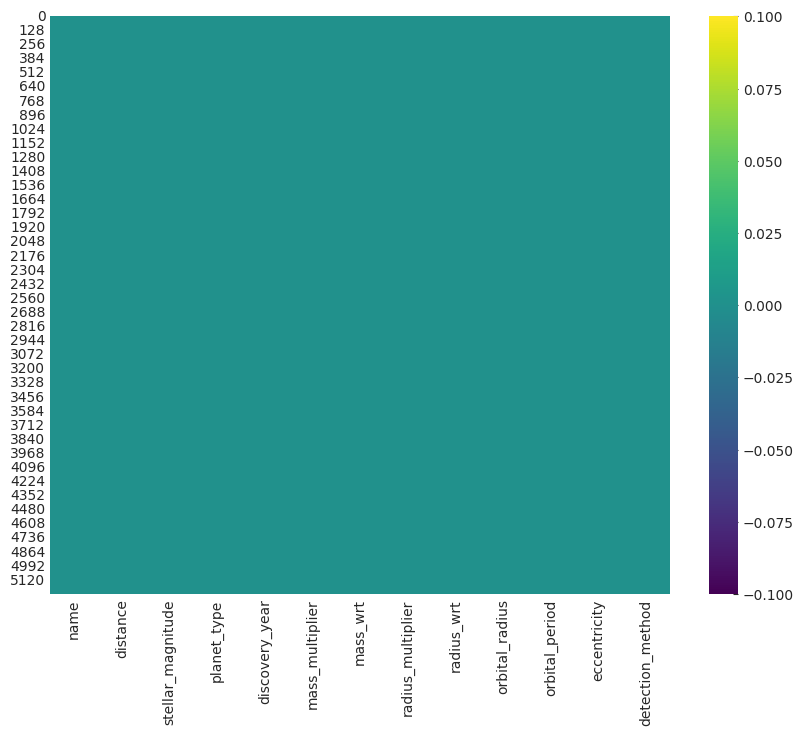

In [207]:
sns.heatmap(df_nasa.isnull(),cmap = 'viridis')                                 #Muestreamos datos nulos

---
---

# **EDA:**


> ## Según los tipos de planetas, ¿Cuántos hay de cada uno?
Para averiguarlo evaluemos la gráfica anterior que nos especifica los tipos de planetas y la cantidad de cada grupo, dando a conocer los "Tipo Neptuno" como el grupo más numerosos de los tipos de planetas descubiertos.

>>Gigantes gaseosos(Gas Giant) 1630 planetas
>>
>>Tipo Neptuno (Neptune-like) 1825 planetas
>>
>>Super Tierras (Super Earth) 1595 planetas
>>
>>Terrestres (Terrestrial) 195 planetas

In [208]:
df_planetasGroup = df_nasa.groupby(["planet_type"]).size().reset_index(name='cantidad') #Agrupamos por tipo de planeta
df_planetasGroup

,planet_type,cantidad
0,Gas Giant,1630
1,Neptune-like,1825
2,Super Earth,1595
3,Terrestrial,195


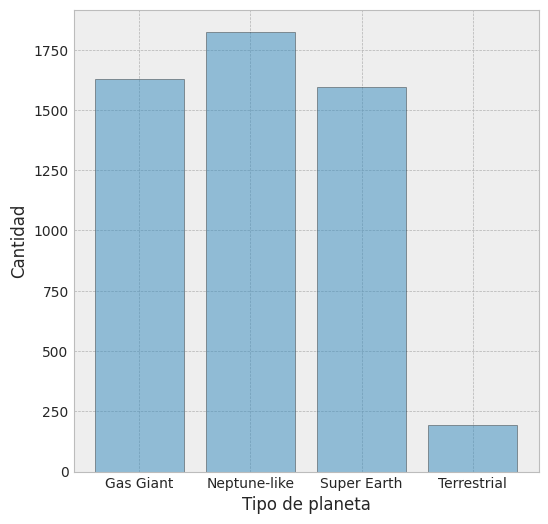

In [209]:
#Subplots mat
fig, ax = plt.subplots(figsize=(6,6))
ax.bar(df_planetasGroup["planet_type"], df_planetasGroup.cantidad, edgecolor='k', alpha=0.5)
ax.set_ylabel('Cantidad')
ax.set_xlabel('Tipo de planeta')
plt.show()

> ## ¿Como los encontramos?

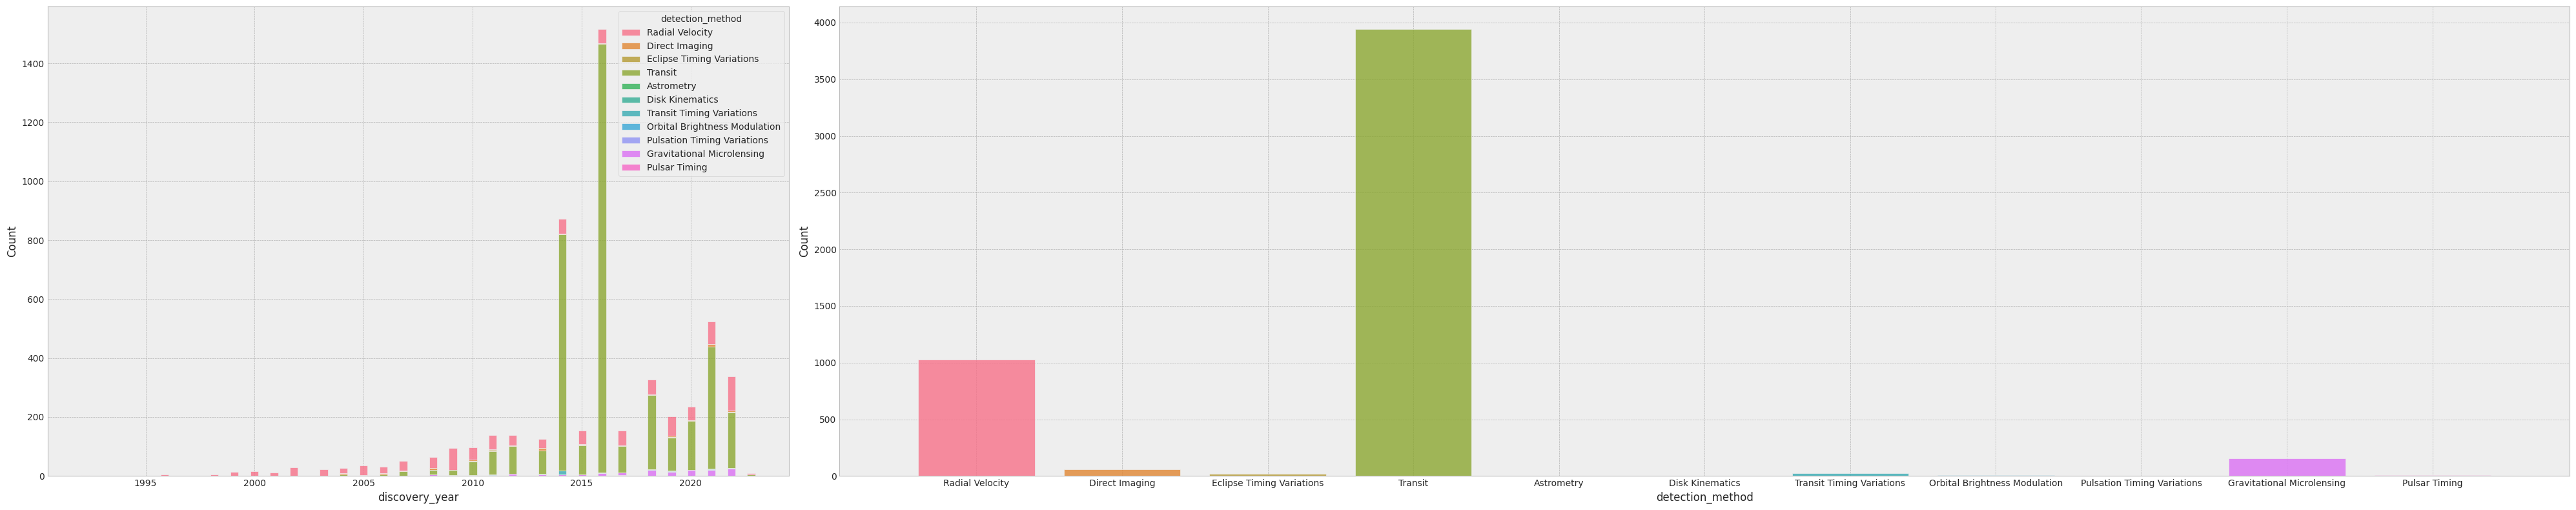

In [210]:
# Axis level
f, axs = plt.subplots(1, 2, figsize=(40, 8),gridspec_kw=dict(width_ratios=[3, 7]))

sns.histplot(data=df_nasa,x="discovery_year",hue="detection_method",multiple="stack", shrink=.8, alpha=.8 ,ax=axs[0])

sns.histplot(data=df_nasa, x="detection_method",
hue="detection_method", shrink=.8, alpha=.8, legend=False,
ax=axs[1])
f.tight_layout()

##¿Cuántos hemos encontrado?

Si hacemos un recuento de nuestra base de datos, hemos provisto un total de 5250 planetas descubiertos hasta el año 2023.

Podemos observar un alcance mayor al pasar los años en cuestión de distancia. Es decir, con el avance tecnológico de los años, hemos logrado "ir cada vez más lejos" para poder encontrar más planetas.

Aun así, no podemos decir que al pasar los años hemos descubierto cada vez más, esto se dio hasta el 2016/2017 llegando al pico de planetas hallados de manera creciente. En consecuencia tuvimos una baja de hallazgos con un pico leve en 2021.

Si los vemos de manera individual por tipos de planetas, notamos un hallazgo creciente en el tiempo con respecto a los Gigantes Gaseosos.

En el caso de las Súper Tierras y los tipos Neptuno tienen un espectro de hallazgo muy similar al general anterior.

In [211]:
Planetas=df_nasa.groupby(['discovery_year']).size().reset_index(name='cantidad')#Creamos tabla contabilizando año de descubimiento
Total= Planetas.cantidad.sum()                                                   #Sumamos todas las filas de la tabla
print("Total:", Total)
print("Por año:", Planetas)

Total: 5245
Por año:     discovery_year  cantidad
0             1992         2
1             1994         1
2             1995         1
3             1996         6
4             1997         1
5             1998         6
6             1999        13
7             2000        16
8             2001        12
9             2002        29
10            2003        22
11            2004        27
12            2005        36
13            2006        31
14            2007        52
15            2008        65
16            2009        94
17            2010        97
18            2011       138
19            2012       138
20            2013       126
21            2014       872
22            2015       155
23            2016      1517
24            2017       153
25            2018       326
26            2019       203
27            2020       234
28            2021       525
29            2022       338
30            2023         9


Text(0.5, 0, 'Año')

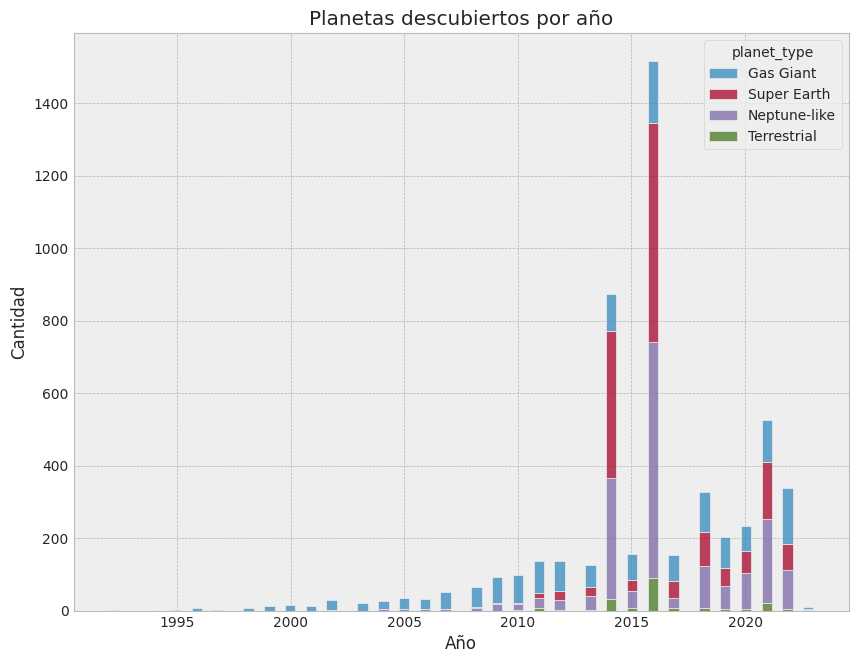

In [212]:
#Hisplot
ax = sns.histplot(data=df_nasa,x="discovery_year",hue="planet_type",multiple="stack")
ax.set_title('Planetas descubiertos por año')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Año')

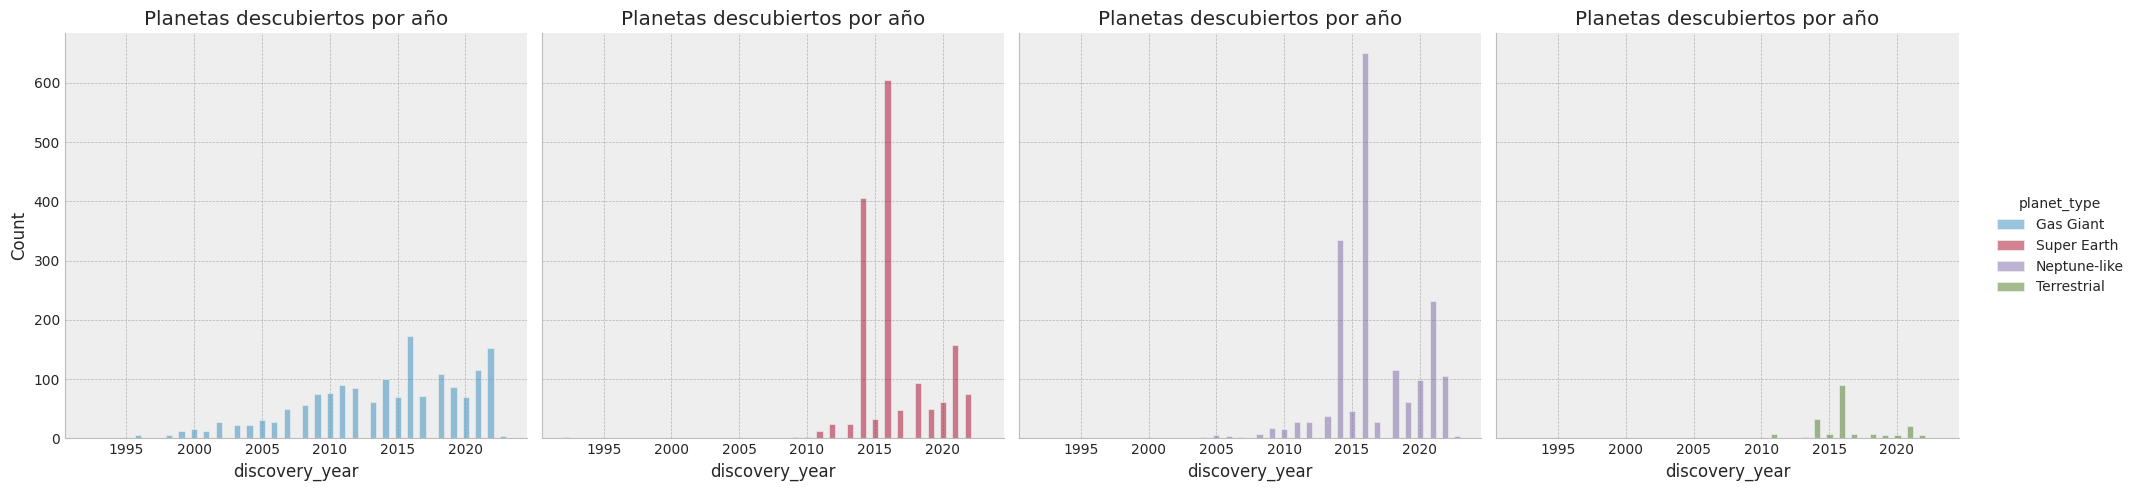

In [213]:
ax = sns.displot(data=df_nasa, x="discovery_year", hue="planet_type", col="planet_type").set(title='Planetas descubiertos por año')

Text(0, 0.5, 'Distancia')

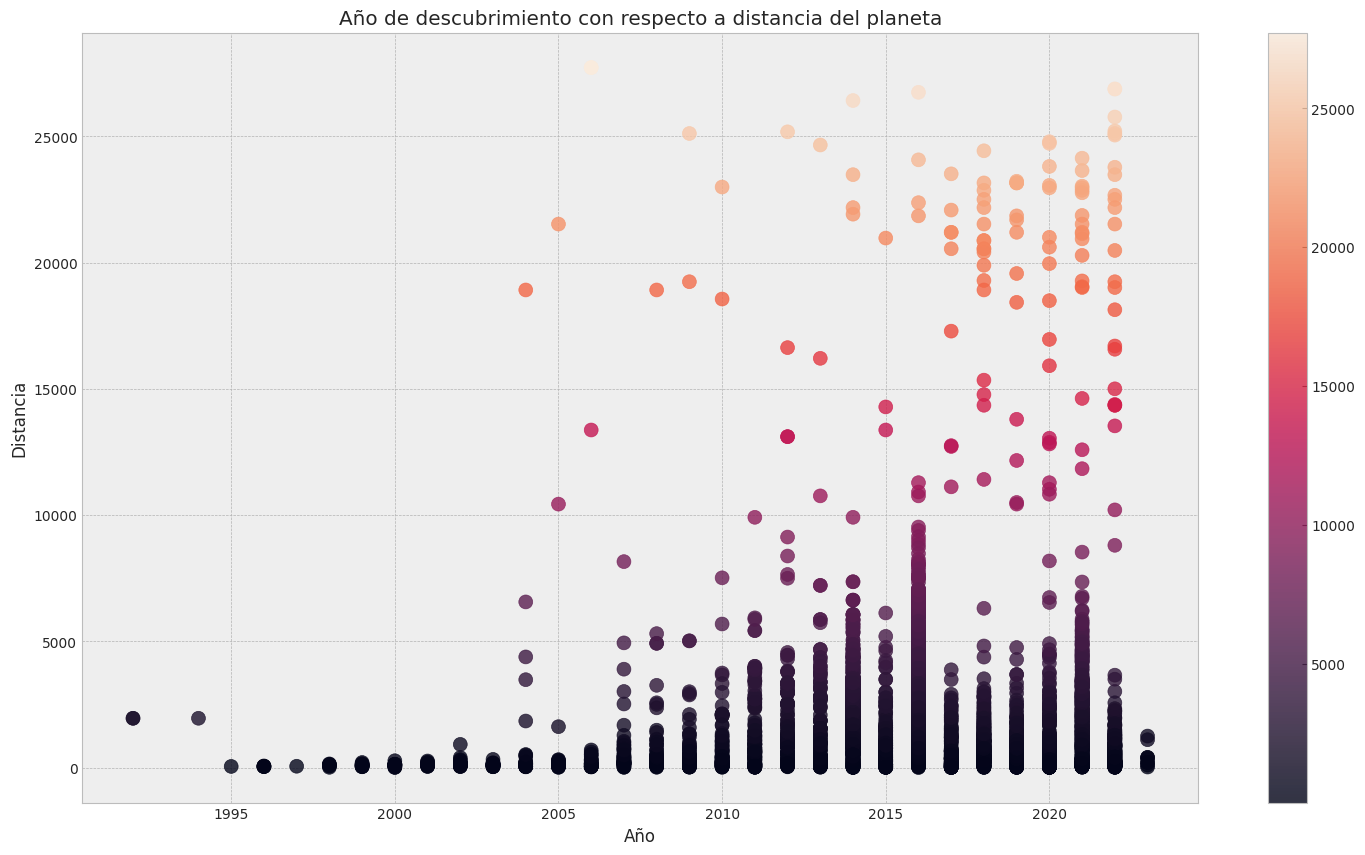

In [214]:
#@title
fig, ax = plt.subplots(figsize=(18, 10))
mapeo_colores = ax.scatter(df_nasa["discovery_year"], df_nasa["distance"],c=df_nasa["distance"], s=100,alpha=0.8)
fig.colorbar(mapeo_colores)
ax.set_title('Año de descubrimiento con respecto a distancia del planeta')
ax.set_xlabel('Año')
ax.set_ylabel('Distancia')

> ## ¿Qué relación encuentras entre los datos de los planetas?

<ipython-input-215-c0ca215c9260>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_Nasa.corr(), annot = True, cmap = "Blues")


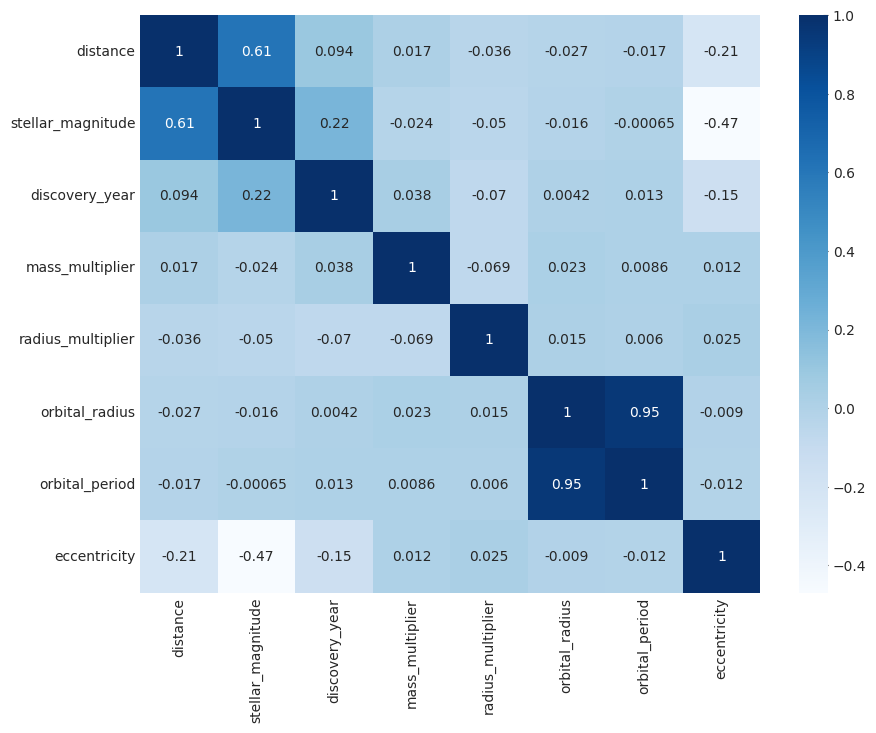

In [215]:
plt.rcParams['figure.figsize']=(10,7.5)                                         #Buscamos correlacion entre variables
sns.heatmap(df_Nasa.corr(), annot = True, cmap = "Blues")
plt.show()

>> ###	¿Qué planetas tienen mayor magnitud estelar?

Observemos y notemos que los tipos gigantes gaseosos (Gas Giant) son los que predominan en magnitud estelar, lo que significa que tienen un mayor espectro luminoso lo que nos permite hallarlos con 	más facilidad y lejanía, siendo así, también son los que tienen mayor distancia con respecto a la Tierra.

Text(0.5, 0, 'Tipo de planeta')

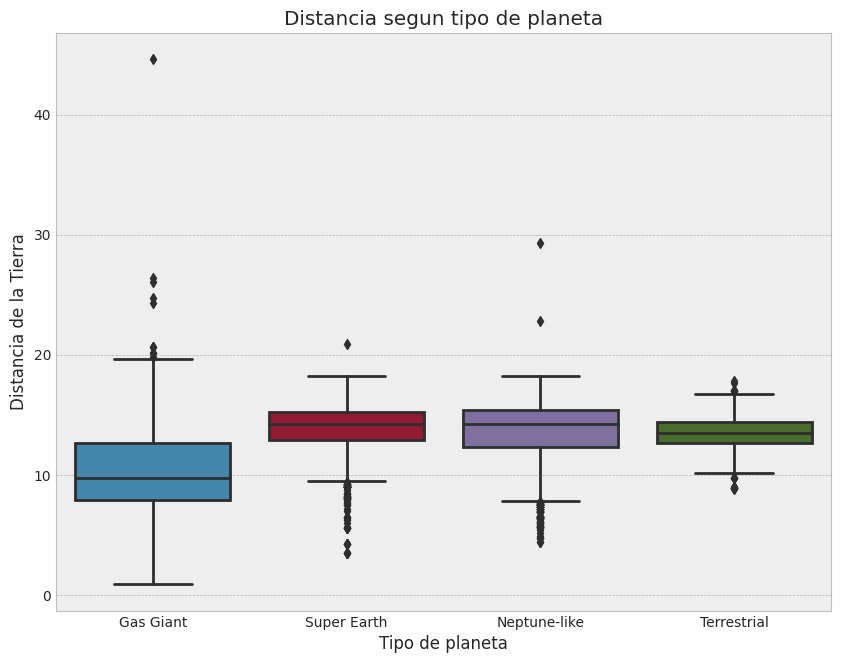

In [216]:
# Boxplot (Muestro sin datos "Unknown")
ax = sns.boxplot(x="planet_type", y="stellar_magnitude", data=df_nasa)
ax.set_title('Distancia segun tipo de planeta')
ax.set_ylabel('Distancia de la Tierra')
ax.set_xlabel('Tipo de planeta')

>> ### ¿Cuáles son los más alejados de nuestro planeta?

Ante esta cuestión podremos concluir que los planetas más alejados de la Tierra corresponden al grupo de los Gigantes Gaseosos continuando en segundo lugar los "Tipos Neptuno".


Text(0.5, 0, 'Tipo de planeta')

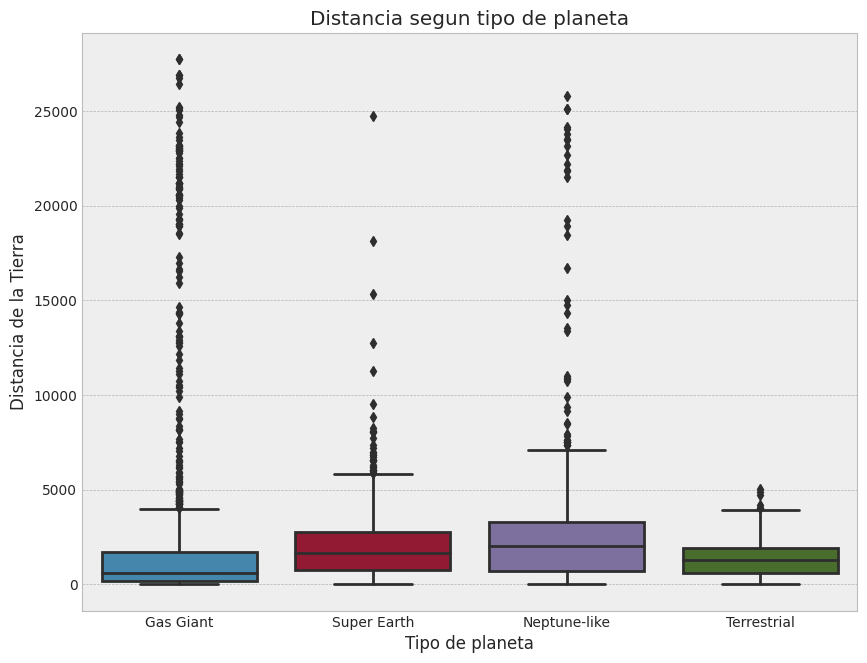

In [217]:
# Boxplot (Muestro sin datos "Unknown")
ax = sns.boxplot(x="planet_type", y="distance", data=df_nasa)
ax.set_title('Distancia segun tipo de planeta')
ax.set_ylabel('Distancia de la Tierra')
ax.set_xlabel('Tipo de planeta')

>> ### ¿Hay alguna relación entre la distancia y la magnitud estelar? ¿Qué observamos?
El gráfico nos demuestra que la relación entre la magnitud estelar y la distancia respecto de la Tierra están asociadas en que mayor sea la distancia de igual manera 	será mayor la Magnitud Estelar. Esto se explica gracias a la Magnitud Estelar, que en cierto modo es el brillo que emiten o reflejan, la cual nos permite identificar a 	los planetas. Mientras más brillen más se ven.

Text(0, 0.5, 'Distancia')

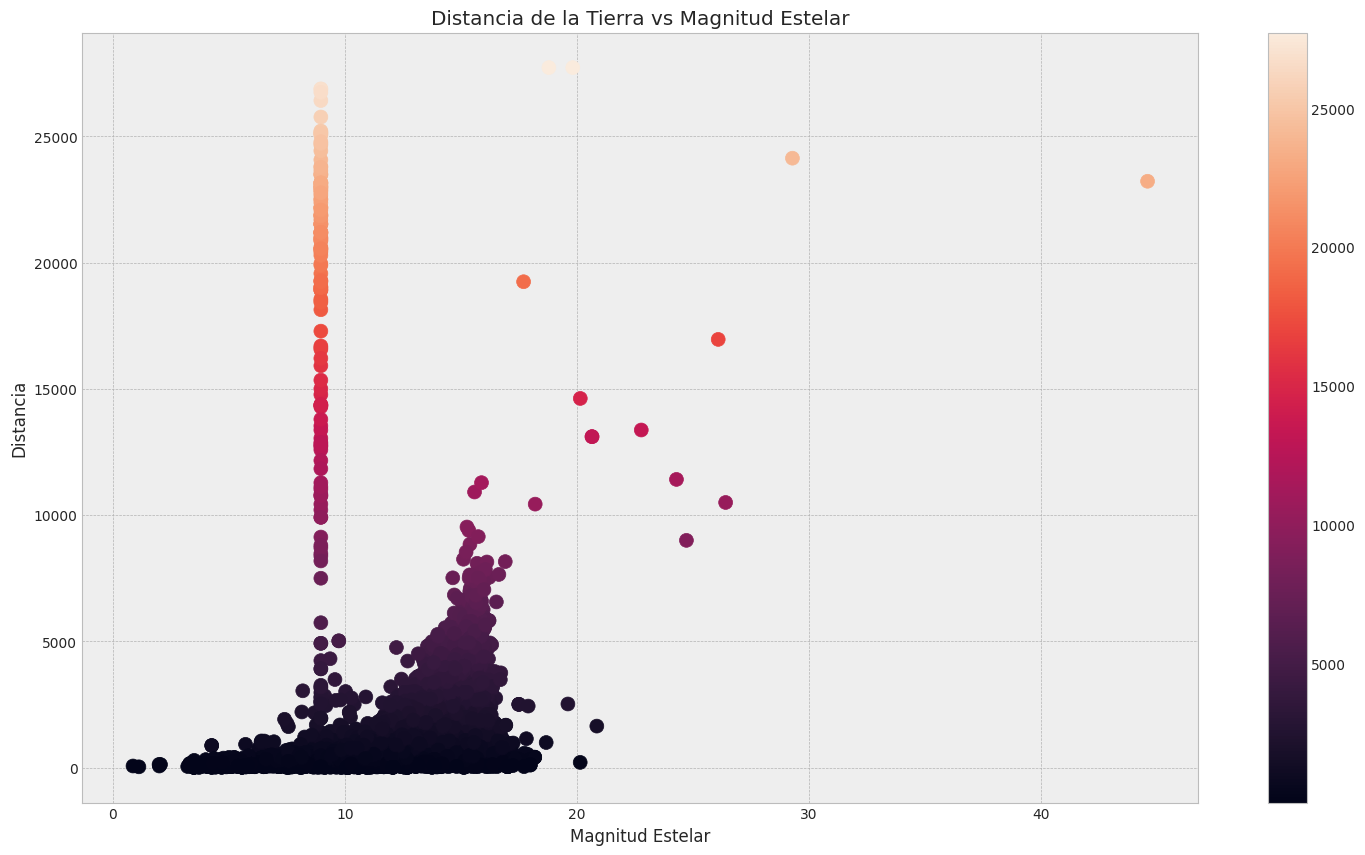

In [218]:
fig, ax = plt.subplots(figsize=(18, 10))
mapeo_colores = ax.scatter(df_nasa['stellar_magnitude'], df_nasa['distance'],c=df_nasa['distance'], s=100)
fig.colorbar(mapeo_colores)
ax.set_title('Distancia de la Tierra vs Magnitud Estelar')
ax.set_xlabel('Magnitud Estelar')
ax.set_ylabel('Distancia')

>> ### ¿Hay alguna relación entre el radio orbital, el periodo orbital y la magnitud estelar? ¿Qué observamos?
No hay una relación notoria con el radio orbital y magnitud estelar, pero si se puede ver su relacion con el periodo orbital. Esto se debe ya que al aumentar el radio orbital, el planeta va a requerir un 	periodo orbital mayor para recorrer su órbita alrededor de su estrella.



Text(0, 0.5, 'Radio orbital')

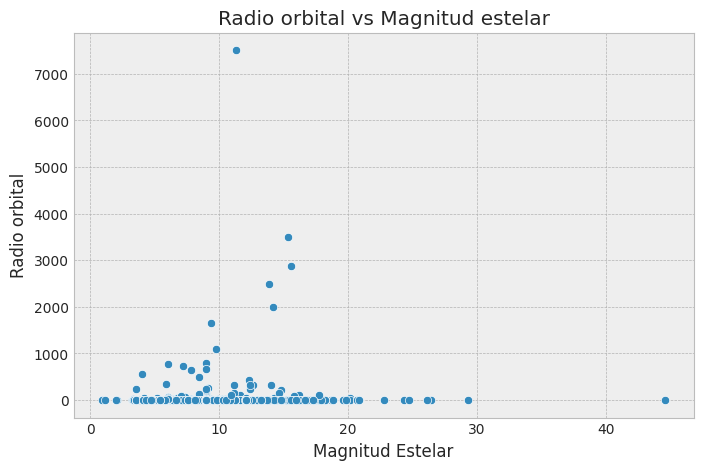

In [219]:
f, axs = plt.subplots(figsize=(8, 5))
axs = sns.scatterplot(data=df_nasa, x="stellar_magnitude",
y="orbital_radius")
axs.set_title('Radio orbital vs Magnitud estelar')
axs.set_xlabel('Magnitud Estelar')
axs.set_ylabel('Radio orbital')

Text(0, 0.5, 'Periodo orbital')

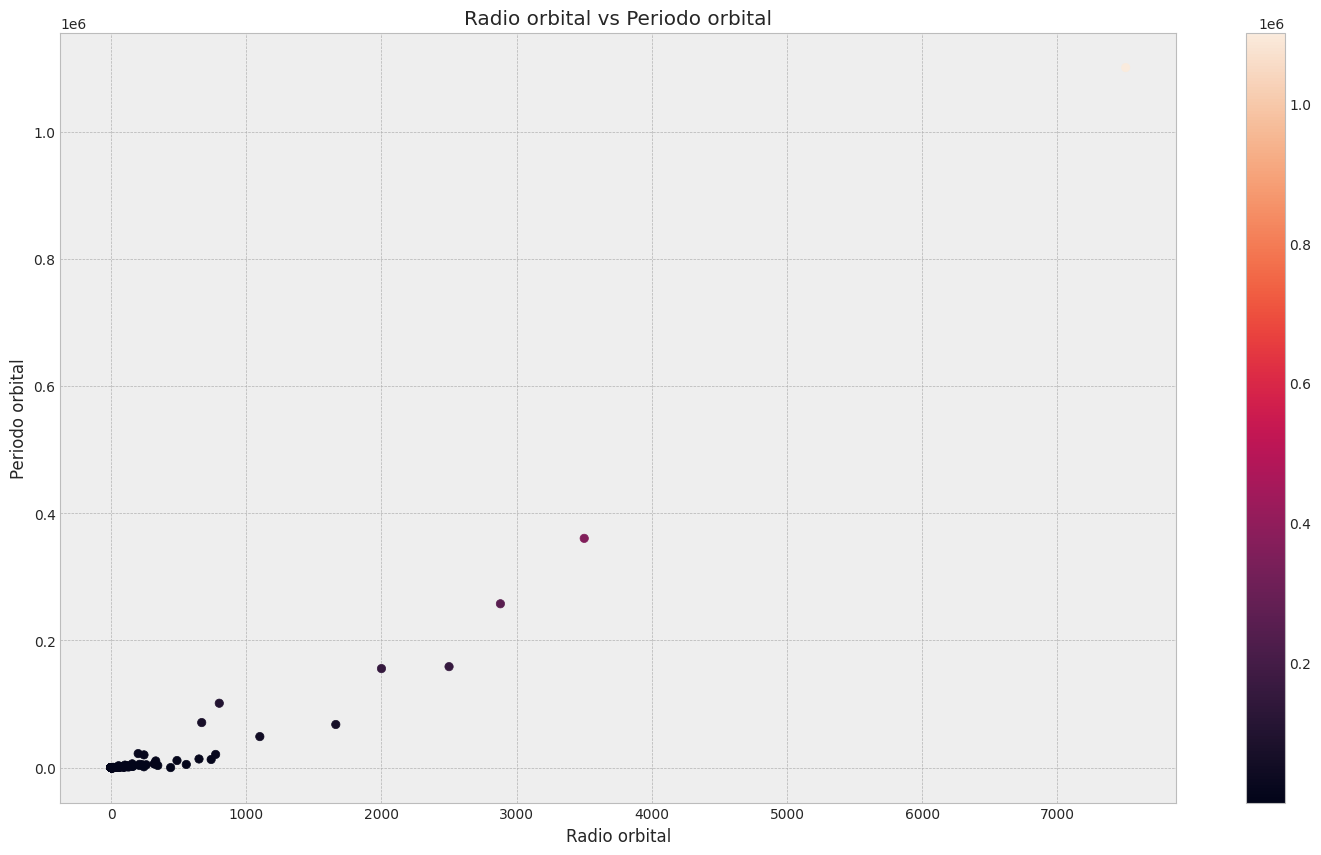

In [220]:
fig, ax = plt.subplots(figsize=(18, 10))
mapeo_colores = ax.scatter(df_nasa['orbital_radius'], df_nasa['orbital_period'],c=df_nasa['orbital_period'])
fig.colorbar(mapeo_colores)
ax.set_title('Radio orbital vs Periodo orbital')
ax.set_xlabel('Radio orbital')
ax.set_ylabel('Periodo orbital')

>## Creacion de variables sinteticas:

*   MasaReal: producto del indice de masa de JUPITER o de LA TIERRA por el multiplicador.
*   RadioReal: producto del indice de orbita de JUPITER o de LA TIERRA por el multiplicador.


In [221]:
df_nasa= df_nasa.assign(MasaReal="")
df_nasa.reset_index(inplace=True, drop=True)

for i in range(len(df_nasa)):
  if df_nasa.iloc[i]['mass_multiplier']!='':
    if df_nasa.iloc[i]['mass_wrt'] == 'Jupiter':
      x = float(df_nasa.iloc[i]['mass_multiplier'])*1898
      df_nasa.at[i,'MasaReal'] = x
    elif df_nasa.iloc[i]['mass_wrt'] == 'Earth':
      x = float(df_nasa.iloc[i]['mass_multiplier'])*5.972
      df_nasa.at[i,'MasaReal'] = x

df_nasa= df_nasa.assign(RadioReal="")
df_nasa.reset_index(inplace=True, drop=True)

for i in range(len(df_nasa)):
  if df_nasa.iloc[i]['mass_multiplier']!='':
    if df_nasa.iloc[i]['mass_wrt'] == 'Jupiter':
      x = float(df_nasa.iloc[i]['mass_multiplier'])*1898
      df_nasa.at[i,'RadioReal'] = x
    elif df_nasa.iloc[i]['mass_wrt'] == 'Earth':
      x = float(df_nasa.iloc[i]['mass_multiplier'])*5.972
      df_nasa.at[i,'RadioReal'] = x
df_nasa.head()

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method,MasaReal,RadioReal
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.4,Jupiter,1.08,Jupiter,1.29,0.892539,0.23,Radial Velocity,36821.2,36821.2
1,11 Ursae Minoris b,409.0,5.013,Gas Giant,2009,14.74,Jupiter,1.09,Jupiter,1.53,1.4,0.08,Radial Velocity,27976.52,27976.52
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.8,Jupiter,1.15,Jupiter,0.83,0.508693,0.0,Radial Velocity,9110.4,9110.4
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.8,0.37,Radial Velocity,15447.46138,15447.46138
4,16 Cygni B b,69.0,6.215,Gas Giant,1996,1.78,Jupiter,1.2,Jupiter,1.66,2.2,0.68,Radial Velocity,3378.44,3378.44



# **Prueba de modelos de clasificacion**
>
>

>### Random Forest

In [222]:
df = df_nasa

In [223]:
X= df.drop(columns= ("name")).drop(columns = ["planet_type"])
#.drop(columns = ["tamaño_real"])

In [224]:
#Importamos el labelencoder de scikit
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
#convertimos en dato numero el pais de origen
df['planet_type'] = LE.fit_transform(df_nasa['planet_type'])
X['mass_wrt'] = LE.fit_transform(X['mass_wrt'])
X['radius_wrt'] = LE.fit_transform(X['radius_wrt'])
X['detection_method'] = LE.fit_transform(X['detection_method'])

In [225]:
X['distance'] = X['distance'].astype(float)
X['stellar_magnitude'] = X['stellar_magnitude'].astype(float)
X['discovery_year'] = X['discovery_year'].astype(float)
X['mass_multiplier'] = X['mass_multiplier'].astype(float)
X['radius_multiplier'] = X['radius_multiplier'].astype(float)
X['orbital_radius'] = X['orbital_radius'].astype(float)
X['orbital_period'] = X['orbital_period'].astype(float)
X['eccentricity'] = X['eccentricity'].astype(float)
X['mass_wrt'] = X['mass_wrt'].astype(float)
X['radius_wrt'] = X['radius_wrt'].astype(float)
X['detection_method'] = X['detection_method'].astype(float)
X['MasaReal'] = X['MasaReal'].astype(float)
X['RadioReal'] = X['RadioReal'].astype(float)
print(X.dtypes)

distance             float64
stellar_magnitude    float64
discovery_year       float64
mass_multiplier      float64
mass_wrt             float64
radius_multiplier    float64
radius_wrt           float64
orbital_radius       float64
orbital_period       float64
eccentricity         float64
detection_method     float64
MasaReal             float64
RadioReal            float64
dtype: object


In [226]:
X

,distance,stellar_magnitude,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method,MasaReal,RadioReal
0,304.0,4.72307,2007.0,19.40000,1.0,1.080,1.0,1.290000,0.892539,0.23,8.0,36821.20000,36821.20000
1,409.0,5.01300,2009.0,14.74000,1.0,1.090,1.0,1.530000,1.400000,0.08,8.0,27976.52000,27976.52000
2,246.0,5.23133,2008.0,4.80000,1.0,1.150,1.0,0.830000,0.508693,0.00,8.0,9110.40000,9110.40000
3,58.0,6.61935,2002.0,8.13881,1.0,1.120,1.0,2.773069,4.800000,0.37,8.0,15447.46138,15447.46138
4,69.0,6.21500,1996.0,1.78000,1.0,1.200,1.0,1.660000,2.200000,0.68,8.0,3378.44000,3378.44000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5240,764.0,10.52100,2019.0,0.70900,1.0,1.373,1.0,0.044210,0.007940,0.04,9.0,1345.68200,1345.68200
5241,357.0,10.88500,2021.0,6.30000,1.0,1.140,1.0,115.000000,1176.500000,0.00,1.0,11957.40000,11957.40000
5242,12.0,12.07400,2017.0,0.70000,0.0,0.913,0.0,0.016340,0.005476,0.06,8.0,4.18040,4.18040
5243,12.0,12.07400,2017.0,1.14000,0.0,1.050,0.0,0.021560,0.008487,0.00,8.0,6.80808,6.80808


In [227]:
y = np.asarray(df.values[0::1, 3])
y = y.astype(float)
print(y)

[0. 0. 0. ... 3. 2. 2.]


In [228]:
y

array([0., 0., 0., ..., 3., 2., 2.])

In [229]:
#Configuracion
!pip install mlxtend
import statsmodels.api as sm
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [230]:
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [231]:
forward_selection(X,y)

<ipython-input-230-79271acff42d>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-230-79271acff42d>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-230-79271acff42d>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-230-79271acff42d>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-2

['radius_wrt',
 'mass_wrt',
 'radius_multiplier',
 'mass_multiplier',
 'stellar_magnitude',
 'eccentricity']

In [232]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=8,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [233]:
sfs.fit(X, y)
sfs.k_feature_names_     #Lista final de features

('distance',
 'stellar_magnitude',
 'discovery_year',
 'mass_multiplier',
 'mass_wrt',
 'radius_multiplier',
 'radius_wrt',
 'eccentricity')

In [234]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [235]:
# Separamos en entrenamiento/test en razon 70/30 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)
# Creamos un modelo Random Forest con parametros por defect
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test)

In [236]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       471
         1.0       0.96      0.99      0.97       553
         2.0       0.98      0.95      0.96       498
         3.0       0.98      0.83      0.90        52

    accuracy                           0.97      1574
   macro avg       0.98      0.94      0.96      1574
weighted avg       0.97      0.97      0.97      1574



>#### **Conclusiones:**

>
###El modelo ha acertado en casi las 4 clases por lo que las maneja muy bien. La 4 clase (3.0) es la que más obtuvo un recall bajo, aun así esta sigue siendo bastante confiable.
###El acierto general ha obtenido un gran número por lo que el modelo es bastante exitoso.

>### ***SVM:***
> Preparamos los datos y ejecutamos

In [237]:
# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configuración warnings
# ==============================================================================
import warnings

In [238]:
#Cargamos los datos!
datos = df_nasa
datosXV = df_nasa
datos.head()

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method,MasaReal,RadioReal
0,11 Comae Berenices b,304.0,4.72307,0,2007,19.4,Jupiter,1.08,Jupiter,1.29,0.892539,0.23,Radial Velocity,36821.2,36821.2
1,11 Ursae Minoris b,409.0,5.013,0,2009,14.74,Jupiter,1.09,Jupiter,1.53,1.4,0.08,Radial Velocity,27976.52,27976.52
2,14 Andromedae b,246.0,5.23133,0,2008,4.8,Jupiter,1.15,Jupiter,0.83,0.508693,0.0,Radial Velocity,9110.4,9110.4
3,14 Herculis b,58.0,6.61935,0,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.8,0.37,Radial Velocity,15447.46138,15447.46138
4,16 Cygni B b,69.0,6.215,0,1996,1.78,Jupiter,1.2,Jupiter,1.66,2.2,0.68,Radial Velocity,3378.44,3378.44


In [239]:
datos.planet_type.unique()

array([0, 2, 1, 3])

In [240]:
datos.shape

(5245, 15)

In [241]:
for i in range(len(datos)):
  if datos.iloc[i]['planet_type']=='Gas Giant':
      datos.at[i,'planet_type'] = 0;

  if datos.iloc[i]['planet_type']=='Super Earth':
      datos.at[i,'planet_type'] = 1;

  if datos.iloc[i]['planet_type']=='Neptune-like':
      datos.at[i,'planet_type'] = 2;

  if datos.iloc[i]['planet_type']=='Terrestrial':
      datos.at[i,'planet_type'] = 3;

In [242]:
datos.planet_type = datos.planet_type.astype('int')

In [243]:
datos.planet_type.unique()

array([0, 2, 1, 3])

In [244]:
datos.head()

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method,MasaReal,RadioReal
0,11 Comae Berenices b,304.0,4.72307,0,2007,19.4,Jupiter,1.08,Jupiter,1.29,0.892539,0.23,Radial Velocity,36821.2,36821.2
1,11 Ursae Minoris b,409.0,5.013,0,2009,14.74,Jupiter,1.09,Jupiter,1.53,1.4,0.08,Radial Velocity,27976.52,27976.52
2,14 Andromedae b,246.0,5.23133,0,2008,4.8,Jupiter,1.15,Jupiter,0.83,0.508693,0.0,Radial Velocity,9110.4,9110.4
3,14 Herculis b,58.0,6.61935,0,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.8,0.37,Radial Velocity,15447.46138,15447.46138
4,16 Cygni B b,69.0,6.215,0,1996,1.78,Jupiter,1.2,Jupiter,1.66,2.2,0.68,Radial Velocity,3378.44,3378.44


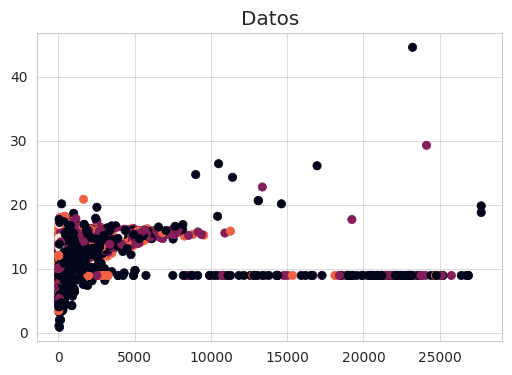

In [245]:
#Visualizacion!
datos = df_nasa
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(datos.distance, datos.stellar_magnitude, c=(datos.planet_type));
ax.set_title("Datos");

In [246]:
# División de los datos en train y test
X = datos[['distance','stellar_magnitude']] # Matriz de 2 columnas -Variable Independientes
y = datos['planet_type'] # Variable Dependiente

In [247]:
X

,distance,stellar_magnitude
0,304.0,4.72307
1,409.0,5.013
2,246.0,5.23133
3,58.0,6.61935
4,69.0,6.215
...,...,...
5240,764.0,10.521
5241,357.0,10.885
5242,12.0,12.074
5243,12.0,12.074


In [248]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5240    0
5241    0
5242    3
5243    2
5244    2
Name: planet_type, Length: 5245, dtype: int64

In [249]:
yres =  y.values.reshape(-1,1)

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),train_size= 0.75,\
                                                    random_state = 42,shuffle=True)

**gamma** es un parámetro para hiperplanos no lineales. Cuanto mayor sea el valor de gamma, intentará ajustarse exactamente al conjunto de datos de entrenamiento.

**C** es el parámetro de penalización del término de error. Controla el equilibrio entre un límite de decisión uniforme y la clasificación correcta de los puntos de entrenamiento.

In [251]:
# Creación del modelo SVM
modelo = SVC(C=0.1,kernel='rbf',random_state=42)
modelo.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, random_state=42)

In [252]:
#Predicciones!
#y_train_pred = modelo.predict(X_train)
y_pred = modelo.predict(X_test)

In [253]:
X_test

,distance,stellar_magnitude
1858,1600.0,13.198
3541,2308.0,13.058
1128,150.0,8.63
4783,51.0,4.48635
931,152.0,7.515
...,...,...
2664,2906.0,14.379
790,175.0,8.97
2201,2929.0,14.854
461,1258.0,16.68


In [254]:
X_test.shape

(1312, 2)

In [255]:
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [256]:
y_test

array([[2],
       [2],
       [1],
       ...,
       [2],
       [0],
       [0]])

In [257]:
#Calculo el accuracy en Test
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.4382621951219512


In [258]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.71      0.55       418
           1       0.43      0.60      0.50       460
           2       0.00      0.00      0.00       386
           3       0.00      0.00      0.00        48

    accuracy                           0.44      1312
   macro avg       0.22      0.33      0.26      1312
weighted avg       0.29      0.44      0.35      1312



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>#### ***Conclusion:***
#### Nos arroja un modelo poco confiable en su predicción.

>### ***Random Forest: Aplicamos PCA***
> Preparamos los datos aplicando PCA para reducir el dataset y ejecutamos

In [259]:
def to_int(val):
    """ Reconoce valores numericos y los transforma a enteros.
    """
    try:
        value = int(float(val))
    except ValueError:
        value = ""
    return value

In [260]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5245 entries, 0 to 5244
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               5245 non-null   object
 1   distance           5245 non-null   object
 2   stellar_magnitude  5245 non-null   object
 3   planet_type        5245 non-null   int64 
 4   discovery_year     5245 non-null   object
 5   mass_multiplier    5245 non-null   object
 6   mass_wrt           5245 non-null   object
 7   radius_multiplier  5245 non-null   object
 8   radius_wrt         5245 non-null   object
 9   orbital_radius     5245 non-null   object
 10  orbital_period     5245 non-null   object
 11  eccentricity       5245 non-null   object
 12  detection_method   5245 non-null   object
 13  MasaReal           5245 non-null   object
 14  RadioReal          5245 non-null   object
dtypes: int64(1), object(14)
memory usage: 614.8+ KB


In [261]:
datos["distance"] = datos["distance"].map(to_int)
datos["stellar_magnitude"] = datos["stellar_magnitude"].map(to_int)
datos["discovery_year"] = datos["discovery_year"].map(to_int)
datos["mass_multiplier"] = datos["mass_multiplier"].map(to_int)
datos["radius_multiplier"] = datos["radius_multiplier"].map(to_int)
datos["orbital_radius"] = datos["orbital_radius"].map(to_int)
datos["orbital_period"] = datos["orbital_period"].map(to_int)
datos["eccentricity"] = datos["eccentricity"].map(to_int)
datos["MasaReal"] = pd.to_numeric(datos["MasaReal"], errors='coerce')
datos["RadioReal"] = pd.to_numeric(datos["RadioReal"], errors='coerce')

datos["MasaReal"] = datos["MasaReal"].fillna(datos["MasaReal"].mean())
datos["RadioReal"] = datos["RadioReal"].fillna(datos["RadioReal"].mean())


In [262]:
def get_num_cat_cols(df):

    num_cls = [x for x in df.columns if df[x].dtype != 'object']
    cat_cls = [x for x in df.columns if x not in num_cls]

    print(f'Numerical columns \n',num_cls)
    print(f'Categorical columns \n',cat_cls)

    return num_cls, cat_cls

num_cols, cat_cols = get_num_cat_cols(datos)

Numerical columns 
 ['distance', 'stellar_magnitude', 'planet_type', 'discovery_year', 'mass_multiplier', 'radius_multiplier', 'orbital_radius', 'orbital_period', 'eccentricity', 'MasaReal', 'RadioReal']
Categorical columns 
 ['name', 'mass_wrt', 'radius_wrt', 'detection_method']


In [263]:
datos[num_cols].describe()

,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity,MasaReal,RadioReal
count,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5.245000e+03,5245.0,5.245000e+03,5.245000e+03
mean,2159.025357,12.040419,1.067684,2015.733460,5.953670,0.656816,6.408580,4.794787e+02,0.0,2.736386e+03,2.736386e+03
std,3242.941070,3.152779,0.871291,4.309166,12.973318,0.602289,134.881583,1.681243e+04,0.0,2.241247e+04,2.241247e+04
min,4.000000,0.000000,0.000000,1992.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,1.194400e-01,1.194400e-01
25%,377.000000,10.000000,0.000000,2014.000000,1.000000,0.000000,0.000000,0.000000e+00,0.0,2.329080e+01,2.329080e+01
50%,1360.000000,13.000000,1.000000,2016.000000,4.000000,1.000000,0.000000,0.000000e+00,0.0,5.040368e+01,5.040368e+01
75%,2773.000000,14.000000,2.000000,2018.000000,8.000000,1.000000,0.000000,0.000000e+00,0.0,9.300200e+02,9.300200e+02
max,27727.000000,44.000000,3.000000,2023.000000,752.000000,6.000000,7506.000000,1.101369e+06,0.0,1.427296e+06,1.427296e+06


In [264]:
#Preprocesamiento
X = datos[num_cols].drop('planet_type', 1)
y = datos[num_cols]['planet_type']

<ipython-input-264-3765fa2c505a>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = datos[num_cols].drop('planet_type', 1)


In [265]:
X

,distance,stellar_magnitude,discovery_year,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity,MasaReal,RadioReal
0,304,4,2007,19,1,1,0,0,36821.20000,36821.20000
1,409,5,2009,14,1,1,1,0,27976.52000,27976.52000
2,246,5,2008,4,1,0,0,0,9110.40000,9110.40000
3,58,6,2002,8,1,2,4,0,15447.46138,15447.46138
4,69,6,1996,1,1,1,2,0,3378.44000,3378.44000
...,...,...,...,...,...,...,...,...,...,...
5240,764,10,2019,0,1,0,0,0,1345.68200,1345.68200
5241,357,10,2021,6,1,115,1176,0,11957.40000,11957.40000
5242,12,12,2017,0,0,0,0,0,4.18040,4.18040
5243,12,12,2017,1,1,0,0,0,6.80808,6.80808


In [266]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5240    0
5241    0
5242    3
5243    2
5244    2
Name: planet_type, Length: 5245, dtype: int64

In [267]:
#Separamos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [268]:
#Normalizamos los datos para que PCA funcione mejor!
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Aplicamos PCA

In [269]:
#Aplicacion de PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [270]:
#Análisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([3.21693228e-01, 2.15880483e-01, 1.48875401e-01, 1.07296373e-01,
       1.00531543e-01, 8.78394843e-02, 1.25092781e-02, 5.37420793e-03,
       1.99018390e-34, 3.24028241e-40])

Insights:
Evaluando la responsabilidad de cada componente observamos que todos, menos los ultimos cuatro, corresponden a un 98% aproximadamente de la varianza.
De tomar solo los primero 3, nos da un 61.3%.

1.   Var: 32.2%
2.   Var: 21.6%
3.   Var: 14.9%
4.   Var: 10.7%
5.   Var: 10%
6.   Var: 8.7%
7.   Var: 1.3%
8.   Var: 0.5%
9.   Var: 0%
10.  Var: 0%

Probaremos con los primero 3 y luego con los primeros 6.

In [271]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [272]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo
model_rf =  RandomForestClassifier(random_state=42, n_estimators=100, max_features="log2")
model_rf.fit(X_train, y_train)

# Predicción
y_pred = model_rf.predict(X_test)

In [273]:
#Evaluación básica del modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('El accuracy del modelo es:', accuracy)

El accuracy del modelo es: 0.8388941849380362


In [274]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.76      0.80       345
           1       0.87      0.93      0.90       367
           2       0.79      0.83      0.81       300
           3       0.76      0.76      0.76        37

    accuracy                           0.84      1049
   macro avg       0.82      0.82      0.82      1049
weighted avg       0.84      0.84      0.84      1049



In [275]:
#Separamos en train y test para probar con 6 componentes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Normalizamos los datos para que PCA funcione mejor!
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Aplicacion de PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Análisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_

from sklearn.decomposition import PCA

pca = PCA(n_components=6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

# Creación del modelo
model_rf =  RandomForestClassifier(random_state=42, n_estimators=100, max_features="log2")
model_rf.fit(X_train, y_train)

# Predicción
y_pred = model_rf.predict(X_test)

#Evaluación básica del modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('El accuracy del modelo es:', accuracy)

El accuracy del modelo es: 0.8894184938036225


In [276]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       345
           1       0.92      0.97      0.95       367
           2       0.85      0.86      0.85       300
           3       0.96      0.70      0.81        37

    accuracy                           0.89      1049
   macro avg       0.90      0.85      0.87      1049
weighted avg       0.89      0.89      0.89      1049



>#### ***Conclusion:***
#### Tenemos un accuracy muy bueno para nuestro modelo usando de 3 a 6 componentes. Con menos cae el accuracy

####Respecto de la variables sinteticas, no han mejorado el modelo.

# ***Cross Validation (Stratified K-Fold):***

In [277]:
datosXV

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method,MasaReal,RadioReal
0,11 Comae Berenices b,304,4,0,2007,19,Jupiter,1,Jupiter,1,0,0,Radial Velocity,36821.20000,36821.20000
1,11 Ursae Minoris b,409,5,0,2009,14,Jupiter,1,Jupiter,1,1,0,Radial Velocity,27976.52000,27976.52000
2,14 Andromedae b,246,5,0,2008,4,Jupiter,1,Jupiter,0,0,0,Radial Velocity,9110.40000,9110.40000
3,14 Herculis b,58,6,0,2002,8,Jupiter,1,Jupiter,2,4,0,Radial Velocity,15447.46138,15447.46138
4,16 Cygni B b,69,6,0,1996,1,Jupiter,1,Jupiter,1,2,0,Radial Velocity,3378.44000,3378.44000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5240,XO-7 b,764,10,0,2019,0,Jupiter,1,Jupiter,0,0,0,Transit,1345.68200,1345.68200
5241,YSES 2 b,357,10,0,2021,6,Jupiter,1,Jupiter,115,1176,0,Direct Imaging,11957.40000,11957.40000
5242,YZ Ceti b,12,12,3,2017,0,Earth,0,Earth,0,0,0,Radial Velocity,4.18040,4.18040
5243,YZ Ceti c,12,12,2,2017,1,Earth,1,Earth,0,0,0,Radial Velocity,6.80808,6.80808


In [278]:
datosXV.isnull().sum()

name                 0
distance             0
stellar_magnitude    0
planet_type          0
discovery_year       0
mass_multiplier      0
mass_wrt             0
radius_multiplier    0
radius_wrt           0
orbital_radius       0
orbital_period       0
eccentricity         0
detection_method     0
MasaReal             0
RadioReal            0
dtype: int64

In [279]:
sum(datosXV.isna().sum())
# no hay nulos

0

In [280]:
# Separar en X y y
X = datos.iloc[:,[1,2,4,14,13]]  # Excluir la tercera columna
y = datos.iloc[:, 3]
print(X.shape, y.shape)


(5245, 5) (5245,)


In [281]:
X["RadioReal"] = X["RadioReal"].astype('int64')
X["MasaReal"] = X["MasaReal"].astype('int64')

<ipython-input-281-287dfbafe03a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["RadioReal"] = X["RadioReal"].astype('int64')
<ipython-input-281-287dfbafe03a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["MasaReal"] = X["MasaReal"].astype('int64')


In [282]:
# crear el procedimiento loocv
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
skf.get_n_splits(X, y)

5

In [283]:
train, test = list(skf.split(X, y))[1]
train

array([   0,    1,    2, ..., 5240, 5241, 5244])

In [284]:
test

array([   4,    5,   18, ..., 5233, 5242, 5243])

In [285]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5240    0
5241    0
5242    3
5243    2
5244    2
Name: planet_type, Length: 5245, dtype: int64

In [286]:
X

,distance,stellar_magnitude,discovery_year,RadioReal,MasaReal
0,304,4,2007,36821,36821
1,409,5,2009,27976,27976
2,246,5,2008,9110,9110
3,58,6,2002,15447,15447
4,69,6,1996,3378,3378
...,...,...,...,...,...
5240,764,10,2019,1345,1345
5241,357,10,2021,11957,11957
5242,12,12,2017,4,4
5243,12,12,2017,6,6


In [287]:
from sklearn.metrics import accuracy_score
# Modelo vacio
model = RandomForestClassifier(random_state=1,n_estimators=30, criterion="gini",max_depth=4)
# Lista para guardar accuracy
list_ac=[]
for i in range(0,skf.get_n_splits(X, y)):
  # Calculo de indices
  train, test = list(skf.split(X, y))[i]
  # Separar train y test
  X_train_n, y_train_n, X_test_n, y_test_n= X.iloc[train], y[train], X.iloc[test],y[test]
  # Ajustar el modelo
  model.fit(X_train_n, y_train_n)
  # Predicciones
  pred= model.predict(X_test_n)
  # Calculo del error
  accuracy= accuracy_score(y_true=y_test_n, y_pred= pred)
  print('Iteracion: ',i+1, ' Accuracy:', accuracy)
  list_ac.append(accuracy)
# Promedio de accuracy
import numpy as np
print('Accuracy promedio:', np.mean(list_ac))

Iteracion:  1  Accuracy: 0.9475691134413727
Iteracion:  2  Accuracy: 0.9532888465204957
Iteracion:  3  Accuracy: 0.9447092469018112
Iteracion:  4  Accuracy: 0.9399428026692088
Iteracion:  5  Accuracy: 0.9551954242135366
Accuracy promedio: 0.9481410867492851


>#### ***Conclusion:***
#### Se implementó exitosamente la técnica de validación cruzada utilizando Stratified K-Fold para evaluar el rendimiento de nuestro modelo. Los resultados obtenidos tras cinco iteraciones demostraron una alta precisión en la clasificación, con una media de precisión (accuracy) promedio del 94.81%. Estos valores indican una eficaz capacidad de generalización y predictibilidad de los modelos desarrollados.